In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

In [2]:
spy = pdr.get_data_yahoo("SPY", "2004-11-01", "2023-11-01")

[*********************100%%**********************]  1 of 1 completed


In [4]:
#here we only need stock with columns call"Adj Close"and "position" then we can calculate its strategy culmulative return
def cal_str_cul_return(stock1):
    stock = stock1.copy()
    
    stock["daily_return"] = stock["Adj Close"].pct_change()
    
    stock["str_return"] = stock["position"]*stock["daily_return"]
    stock["cul_return"] = (1+stock["str_return"]).cumprod()
    return stock

In [7]:
#first we calculate baseline performance
spy1 = spy[["Adj Close"]]

spy1["position"] = 1

spy1 = cal_str_cul_return(spy1)

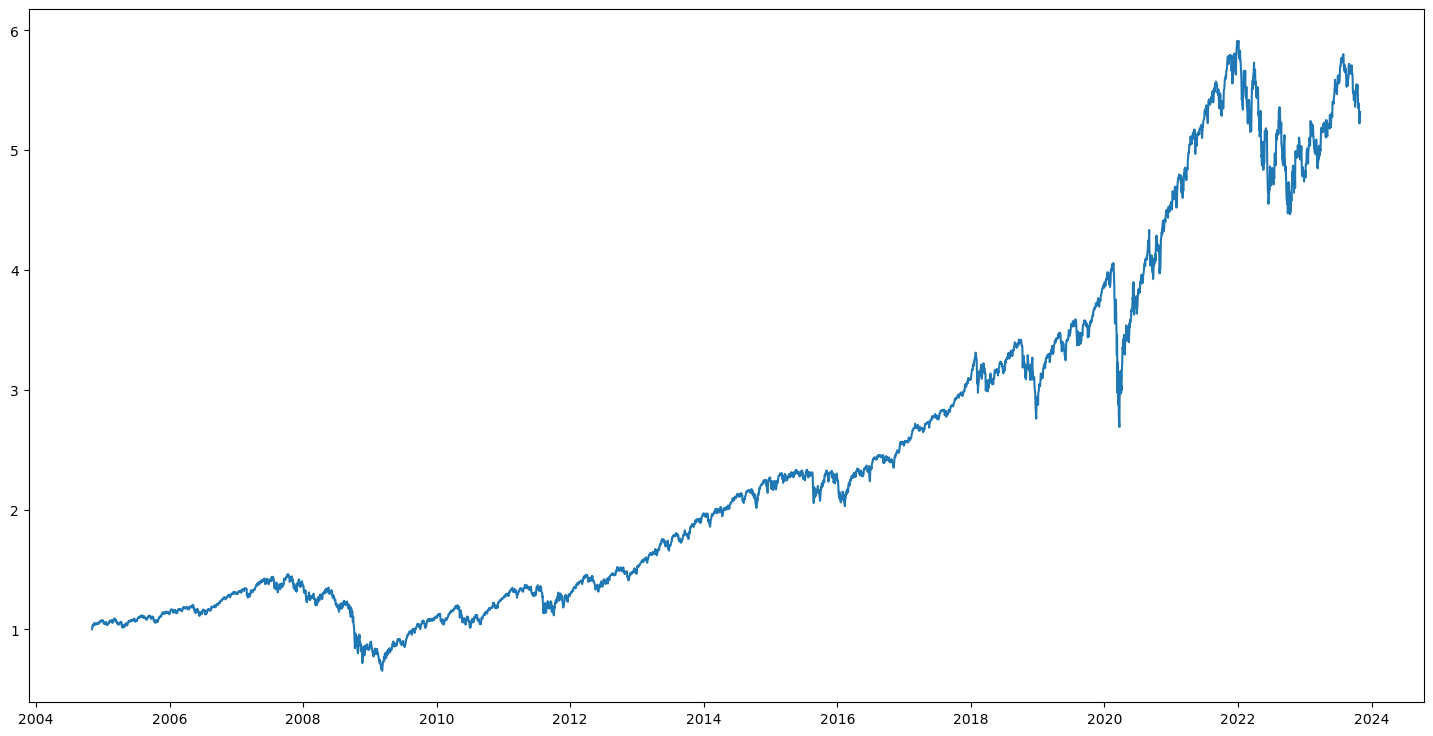

In [8]:
plt.figure(figsize=[18,9])
plt.plot(spy1["cul_return"])
plt.show()

In [9]:
#df column calld "str_return"
def cal_sharpe(stock):
    Sharpe =\
    (
        np.sqrt(253) * (stock["str_return"].mean() / stock["str_return"].std()
                        )
    )

    return Sharpe

In [11]:
#df with colum called "cul_return", index date
def cal_CAGR(stock):
    days =\
    (    (stock.index[-1] - stock.index[0])
         .days
    )

    CAGR =\
    (
        (
          (
            (stock["cul_return"][-1]) / 1
          )
            **(365.0/days) 
        ) 
        - 1
    )

    return CAGR

In [12]:
def cal_max_drawdown(stock1):
    stock = stock1.copy()
    
    stock["max_performance"] = stock["cul_return"].cummax()
    stock["drawdown"] = 1 - stock["cul_return"]/stock["max_performance"]
    max_drawdown = stock["drawdown"].max()
    return max_drawdown

In [31]:
def cal_metrics(stock):
    return pd.Series({"sharpe_ratio": cal_sharpe(stock), "CAGR": cal_CAGR(stock), "max_drawdown":cal_max_drawdown(stock)})

In [30]:
cal_metrics(spy1)

sharpe_ratio    0.975474
CAGR            0.061040
max_drawdown    0.059239
dtype: float64